<a href="https://colab.research.google.com/github/RohanCheera/Sentiment-Analysis/blob/main/Analyzing_Amazon_Product_Reviews_with_Python_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyzing Amazon Product Reviews with Python: A Sentiment Analysis**

**Introduction:**

Amazon, a global e-commerce giant, boasts a massive customer base, with millions of people shopping on its platform daily. With an average daily revenue of $638.1 million, Amazon stands as one of the largest online marketplaces worldwide. The valuable data generated by these customers' product reviews presents an excellent opportunity for a data science project. In this article, we will walk you through the process of performing sentiment analysis on Amazon product reviews using Python.



**Data Retrieval**

The dataset we'll use for this sentiment analysis project was sourced from Kaggle and contains reviews from over 568,000 customers who have purchased products on Amazon. This dataset is a treasure trove of insights into customer opinions and provides ample material for analysis. Let's begin by importing the necessary Python libraries and loading the dataset:# New Section

In [ ]:
import pandas as pd
import requests
import io
url='https://raw.githubusercontent.com/shreya-maher/DSEM_Datasets/main/amazon_reviews.csv'
response = requests.get(url)

if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
    print("Data loaded successfully.")
else:
    print("Failed to fetch data.")


Data loaded successfully.


In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,98947,B005QRPH78,A36NUDST4Y5JBA,"D. S. HARDEN ""a movie fan""",0,0,4,1320105600,"Zoe Low Calorie 6.6-Ounce Chew Sticks, Large...",As I had been alerted that just several chew s...
1,390087,B002IZFLSQ,A150XHDSFKHOJ4,Natalie Hopkins,0,0,5,1316908800,best treats,"My cat come running from any where, even if sh..."
2,116686,B002YJ0118,A1T2RO4T29TNUL,R. Stalnaker,1,1,4,1325894400,Pretty damn close,Arrived in a timely manner. Cooks up with ver...
3,151392,B0033P2RN2,ABC5E1OXKOLIX,Weazel,0,0,5,1334275200,Really good and pretty hot,nice and hot. it has a kind of vineger taste ...
4,362646,B003JA5KKS,A3T3W24FV61W94,JudithP.,1,1,2,1345161600,Dissapionted,Very dissapionted in this oder.Have had this c...


**Data Cleaning**

Before diving into sentiment analysis, it's essential to ensure data quality. Checking for missing values and handling them appropriately is a crucial step.

In [ ]:
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   3
Text                      0
dtype: int64
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


**Sentiment Analysis of Amazon Product Reviews:**

The "Score" column in this dataset represents the ratings customers have assigned to the products they purchased. To better understand how customers rate Amazon products, let's visualize the distribution of these ratings:

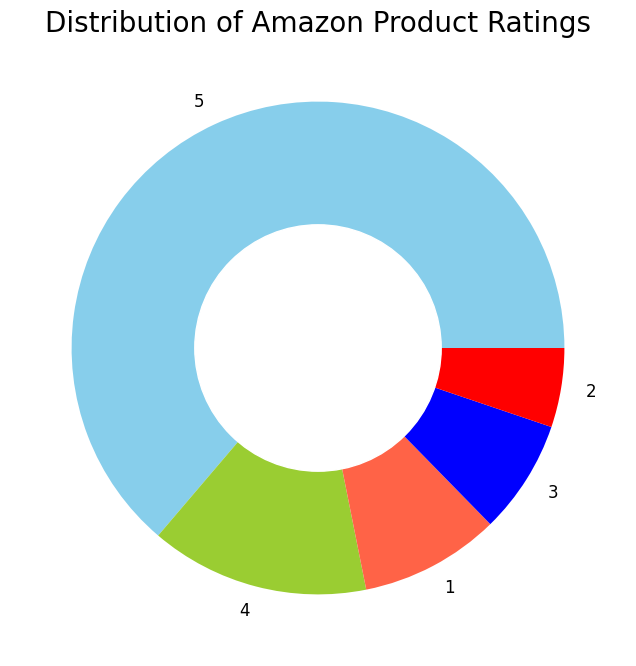

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(8, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

**Sentiment Analysis**

From the pie chart, we can observe that a significant portion of customers assigns 5-star ratings, indicating overall positive sentiment.

To perform sentiment analysis, we'll calculate sentiment scores for each customer review and add three new columns: "Positive," "Negative," and "Neutral":

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())


       Id   ProductId          UserId                 ProfileName  \
0   98947  B005QRPH78  A36NUDST4Y5JBA  D. S. HARDEN "a movie fan"   
1  390087  B002IZFLSQ  A150XHDSFKHOJ4             Natalie Hopkins   
2  116686  B002YJ0118  A1T2RO4T29TNUL                R. Stalnaker   
3  151392  B0033P2RN2   ABC5E1OXKOLIX                      Weazel   
4  362646  B003JA5KKS  A3T3W24FV61W94                    JudithP.   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      4  1320105600   
1                     0                       0      5  1316908800   
2                     1                       1      4  1325894400   
3                     0                       0      5  1334275200   
4                     1                       1      2  1345161600   

                                           Summary  \
0  Zoe Low Calorie 6.6-Ounce Chew Sticks, Large...   
1                                      best treats   
2 

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


**Analyzing Sentiment Scores:**

Let's analyze the overall sentiment scores based on the "Positive," "Negative," and "Neutral" sentiments:

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  8726.023999999989
Negative:  1914.0479999999814
Neutral:  34826.87900000003


The analysis reveals that most people express neutral sentiments in their reviews of Amazon products, followed by positive sentiments. Overall, the sentiment scores indicate a predominance of positive and neutral reviews.

**Conclusion:**

Analyzing the sentiments of Amazon product reviews is a valuable exercise given Amazon's massive customer base and revenue. By performing sentiment analysis, we gain insights into how customers perceive products on the platform. We hope you found this article on Amazon Product Reviews Sentiment Analysis with Python informative and insightful.